In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# magic command for matplotlib to enable printing directly in the jupyter notebook
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import plot_confusion_matrix
#from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample,shuffle
from sklearn.model_selection import GridSearchCV


In [2]:
# PATHS

# get working directory
path_working = Path.cwd()

path_data_binary = str(path_working) + "\\" + "data" + "\\" + "binary" + "\\"

path_data_triple = str(path_working) + "\\" + "data" + "\\" + "triple" + "\\"

path_data_multiclass = str(path_working) + "\\" + "data" + "\\" + "multiclass" + "\\"


In [3]:
def create_dataframe (path):
    # Get the files from the path provided in the OP
    files = Path(path).glob('*.csv')  # .rglob to create iterator for subdirectories
    
    #Find all csv files in directory and concatenate them
    dfs = list()
    names = list()
    for file in files:
        data = pd.read_csv(file)
        # .stem is method for pathlib objects to get the filename without the extension
        # create another column in dataframe for filename
        data['file'] = file.stem
        names.append(file.stem)
        dfs.append(data)
    
    df = pd.concat(dfs, ignore_index=True)
    
    return df


In [4]:
df_raw_binary = create_dataframe(path_data_binary)

In [5]:
df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       relay1_log  relay2_log  relay3_log  relay4_log  snort_log1  snort_log2  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
78372           0           0           0           0           0           0   
78373           0           0           0           0           0           0   
78374           0           0           0           0           0           0   
78375           0           0           0           0           0           0   
78376           0           0           0           0           0           0   

       snort_log3  snort_log4   marker   file  
0               0           0  Natural  data1  
1               0           0  Natural  data1  
2               0           0  Natural  data1  
3               0           0  Natural  data1  
4               0           0  Natural  data1  
...           ...         ...      ...    ...  
78372           0           0  Natural  data9  
78373           0           0  Natural  data9  
78374           0           0  Natural  data9  
78375           0           0  Natural  data9  
78376           0           0  Natural  data9  

[78377 rows x 130 columns]

In [6]:
#drop last column taht shows csv filename source:
del df_raw_binary[df_raw_binary.columns[-1]]

df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4   marker  
0               0           0           0           0  Natural  
1               0           0           0           0  Natural  
2               0           0           0           0  Natural  
3               0           0           0           0  Natural  
4               0           0           0           0  Natural  
...           ...         ...         ...         ...      ...  
78372           0           0           0           0  Natural  
78373           0           0           0           0  Natural  
78374           0           0           0           0  Natural  
78375           0           0           0           0  Natural  
78376           0           0           0           0  Natural  

[78377 rows x 129 columns]

In [7]:
print(df_raw_binary.shape)

df_raw_binary['marker'].value_counts()

(78377, 129)


Attack     55663
Natural    22714
Name: marker, dtype: int64

### ---> unbalanced classes

In [8]:
df_raw_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


In [9]:
# Look at datatypes of coloumns.
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )

In [10]:
show_dtypes(df_raw_binary)

R1-PA1:VH -> float64
R1-PM1:V -> float64
R1-PA2:VH -> float64
R1-PM2:V -> float64
R1-PA3:VH -> float64
R1-PM3:V -> float64
R1-PA4:IH -> float64
R1-PM4:I -> float64
R1-PA5:IH -> float64
R1-PM5:I -> float64
R1-PA6:IH -> float64
R1-PM6:I -> float64
R1-PA7:VH -> float64
R1-PM7:V -> float64
R1-PA8:VH -> float64
R1-PM8:V -> float64
R1-PA9:VH -> float64
R1-PM9:V -> float64
R1-PA10:IH -> float64
R1-PM10:I -> float64
R1-PA11:IH -> float64
R1-PM11:I -> float64
R1-PA12:IH -> float64
R1-PM12:I -> float64
R1:F -> float64
R1:DF -> float64
R1-PA:Z -> float64
R1-PA:ZH -> float64
R1:S -> int64
R2-PA1:VH -> float64
R2-PM1:V -> float64
R2-PA2:VH -> float64
R2-PM2:V -> float64
R2-PA3:VH -> float64
R2-PM3:V -> float64
R2-PA4:IH -> float64
R2-PM4:I -> float64
R2-PA5:IH -> float64
R2-PM5:I -> float64
R2-PA6:IH -> float64
R2-PM6:I -> float64
R2-PA7:VH -> float64
R2-PM7:V -> float64
R2-PA8:VH -> float64
R2-PM8:V -> float64
R2-PA9:VH -> float64
R2-PM9:V -> float64
R2-PA10:IH -> float64
R2-PM10:I -> float64
R2-P

In [11]:
# .copy() is very important otherwise its just a pointer
df = df_raw_binary.copy()

In [12]:
def marker_to_numeric_binary(x):
        if x=='Attack': return 0
        if x=='Natural': return 1
        
LABEL_MAP = {0 : "Attack", 1: "Natural"}

LABELNAMES = [LABEL_MAP[key] for key in LABEL_MAP]

df['marker'] = df['marker'].apply(marker_to_numeric_binary)
df

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4  marker  
0               0           0           0           0       1  
1               0           0           0           0       1  
2               0           0           0           0       1  
3               0           0           0           0       1  
4               0           0           0           0       1  
...           ...         ...         ...         ...     ...  
78372           0           0           0           0       1  
78373           0           0           0           0       1  
78374           0           0           0           0       1  
78375           0           0           0           0       1  
78376           0           0           0           0       1  

[78377 rows x 129 columns]

In [13]:
print(LABELNAMES)

['Attack', 'Natural']


In [14]:
# Check for infinite float entries
# "np.finfo(np.float64).max" returns the maximum finite value that can be represented by a 64-bit floating point number
# "df.values >= np.finfo(np.float64).max" returns a bollean array where "np.finfo(np.float64).max" is checked
# "np.where(df.values >= np.finfo(np.float64).max)" returns a array of indices where "df.values >= np.finfo(np.float64).max" is true

np.where(df.values >= np.finfo(np.float64).max)

(array([  738,   739,   753, ..., 78352, 78353, 78353], dtype=int64),
 array([26, 26, 26, ..., 55, 26, 55], dtype=int64))

### ----> we have infinite float entries

In [15]:
# Check for NaN values
np.isnan(df.values.any())

False

### ----> we have no NaN values in the dataframe

In [16]:
# Replace infinite updated data with nan

# "[np.inf, -np.inf]" specifies the values to be replaced
# "np.nan" specifies the value to replace the infinite values with.
# "inplace=True" modifies the Dataframe in place, so that the original df is updated the new values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

print(df.shape)

df['marker'].value_counts()

(72073, 129)


0    51445
1    20628
Name: marker, dtype: int64

### ----> Due to cleaning up NaNs and infinites we lost about 6000 datapoints, which is not very harmful due to the fact that there are still 72000 rows

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

#This only copies a Series Object, no pandas Dataframe!
df_marker = df["marker"].copy()
#Converting to Pandas Dataframe
df_marker = pd.DataFrame(df_marker)

#Delete Marker column because "marker" should not be normalized
df_nomarker = df.copy()
del df_nomarker[df_nomarker.columns[-1]]

#Initialize SCaler
scaler = StandardScaler()
#Scale data
data_normalized = scaler.fit_transform(df_nomarker)
#insert normalized data in former pandas frame
df_normalized_nomark = pd.DataFrame(data_normalized, columns=df_nomarker.columns)

#concat "marker" column with normalized rest dataframe, index of marker frame is overwritten
df_normalized = pd.concat([df_normalized_nomark, df_marker.set_index(df_normalized_nomark.index)], axis=1)

#print(df_normalized_nomark)

#print(isinstance(df, pd.DataFrame))

#print(isinstance(df_marker, pd.DataFrame))

#print(df_normalized)

In [18]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components
pca = PCA(n_components=10)

# Fit the PCA model to the data
pca.fit(df_normalized_nomark)

# Transform the data onto the new feature space
df_normalized_nomark_transformed = pca.transform(df_normalized_nomark)

# Create a new DataFrame with the transformed features and column names
pca_columns = ['PC{}'.format(i+1) for i in range(10)]
pca_df = pd.DataFrame(df_normalized_nomark_transformed, columns=pca_columns)

# Concatenate the label column to the PCA DataFrame
#pca_df = pd.concat([pca_df, df_marker], axis=1)

#concat "marker" column with normalized rest dataframe, index of marker frame is overwritten
pca_df = pd.concat([pca_df, df_marker.set_index(df_normalized_nomark.index)], axis=1)

# Inspect the new DataFrame
#print(pca_df.head())


In [19]:
y = pca_df['marker']

X = pca_df.drop(['marker'],axis =1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((57658, 10), (57658,), (14415, 10), (14415,))

In [21]:
params = {'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 571}

In [22]:
model_rf_best = RandomForestClassifier(**params, random_state=42)
%time model_rf_best.fit(X_train, y_train) #jupyter magic command %time to measure the computing time for a single line of code


Wall time: 2min 35s


RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=571,
                       random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
def evaluate_model(model, X_test, y_test, labelmap, binarylabels = False):
    """
    Evaluate a multiclass classification model using various metrics.
    
    Args:
        model (sklearn estimator): The model to evaluate.
        X_test (pandas dataframe): The test features.
        y_test (pandas series): The true labels
        labelmap (dict): The encoding of the names of the labels that are passed to report and matrix
        binarylabels (bool): If True model was built out of a binary classification problem
        
    Returns:
        sklearn confusionmatrix , sklearn report, metrics
    """
    
    #THIS IS EXTREMELY IMPORTANT:
    # scikit learn sorts labels in ascending order, thus 0's are first column/row and 1's are the second one
    # this means also that 0's are positive class in the report as well as in the confusion matrix!
    # To be on the safe side, here the labels are given by labelmap, where "Attack" has the key 0! So "Attack" is positive class!
    
    labelnames = [labelmap[key] for key in labelmap]

    
    # Predict the test labels using the trained model
    y_pred = model.predict(X_test)
    
    # map encoded labels to original labels
    y_true = [labelmap[i] for i in y_test]
    y_pred = [labelmap[i] for i in y_pred]
    
    # Compute the confusion matrix and print it
    confusionmatrix = confusion_matrix(y_true, y_pred, labels=labelnames)
    print("Confusion matrix:")
    print(confusionmatrix)
    
    # Compute the classification report and print it
    report = classification_report(y_true, y_pred, target_names=labelnames)
    print("Classification report:")
    print(report)
    
    if binarylabels == True:
        # Calculate metrics out of confusion matrix to compare
        
        tp, fn, fp, tn = confusionmatrix.ravel() # here also important first row, first columns are 0 so positive class so tp

        #  0   1
        # 0 [tp, fn]
        # 1 [fp, tn]

        precision = tp / (tp+fp)
        recall = tp / (tp+fn)
        specificity = tn / (tn+fp)

        metrics = [precision, recall, specificity]
        
    else:
        metrics = None
    
    return confusionmatrix, report, metrics

In [28]:
cm, rp, mets = evaluate_model(model_rf_best, X_test, y_test, LABEL_MAP, True)

Confusion matrix:
[[9931  358]
 [1084 3042]]
Classification report:
              precision    recall  f1-score   support

      Attack       0.90      0.97      0.93     10289
     Natural       0.89      0.74      0.81      4126

    accuracy                           0.90     14415
   macro avg       0.90      0.85      0.87     14415
weighted avg       0.90      0.90      0.90     14415



In [30]:
print(mets)

[0.9015887426236949, 0.9652055593352123, 0.737275811924382]


<AxesSubplot:>

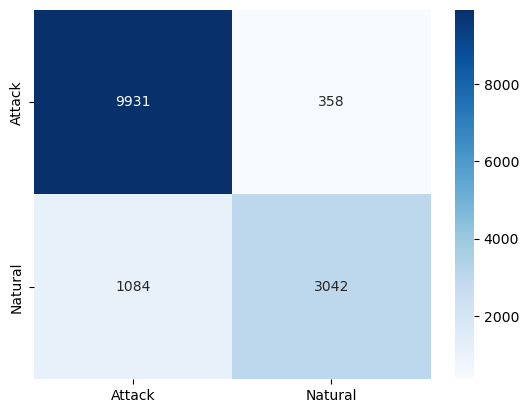

In [29]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELNAMES, yticklabels=LABELNAMES)
# xticklabels=LABELNAMES, yticklabels=LABELNAMES